In [1]:
from bs4 import BeautifulSoup
from yfinance import Ticker, download
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [153]:
avail_cryptos = pd.read_excel("yf-crypto-tickers.xlsx").set_index("Unnamed: 0")["Tickers"]

In [173]:
df_close = pd.DataFrame()

for i in range(len(avail_cryptos)):
    df = Ticker(avail_cryptos[i]).history(period="30d")["Close"].rename(avail_cryptos[i])
    df_close = pd.concat([df_close, df], axis=1)
    
df_close = df_close.dropna(axis=1)
df_close = df_close.drop("USDT-USD", axis=1)
df_close = df_close.drop("USDC-USD", axis=1)

In [174]:
df_ret = df_close.pct_change().dropna()

In [176]:
corr = df_ret.corr()
highest_corr = corr.idxmin(axis=1)

In [192]:
i=50
highest_corr[i+0:i+10]

THETA-USD     SYS-USD
KAVA-USD       NU-USD
ATOM1-USD    SHIB-USD
MATIC-USD    SHIB-USD
ADA-USD      SHIB-USD
BCH-USD       SYS-USD
CHZ-USD        NU-USD
XTZ-USD        NU-USD
ETH-USD        NU-USD
HOT1-USD       NU-USD
dtype: object

<AxesSubplot:>

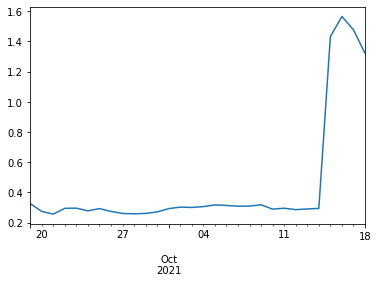

In [194]:
df_close["NU-USD"].plot()

In [195]:
corr

,BTC-USD,ETH-USD,SHIB-USD,DOGE-USD,BTC-USD,ETH-USD,BNB-USD,DOT1-USD,XRP-USD,ETH-USD,...,SYS-USD,ALGO-USD,MATIC-USD,BTC-USD,CELO-USD,CKB-USD,HBAR-USD,BTT1-USD,SUSHI-USD,KSM-USD
BTC-USD,1.000000,0.842168,0.513062,0.750104,1.000000,0.842168,0.632568,0.709133,0.749351,0.842168,...,0.143584,0.546494,0.705448,1.000000,0.108199,0.661810,0.556421,0.699264,0.631463,0.599122
ETH-USD,0.842168,1.000000,0.234928,0.737965,0.842168,1.000000,0.770187,0.782713,0.835840,1.000000,...,0.192317,0.770609,0.712088,0.842168,0.216686,0.733800,0.836147,0.794289,0.851366,0.715994
SHIB-USD,0.513062,0.234928,1.000000,0.470481,0.513062,0.234928,0.066770,0.081963,0.151386,0.234928,...,0.030212,0.051736,-0.037113,0.513062,-0.150004,0.229655,0.066133,0.256017,0.048565,0.058334
DOGE-USD,0.750104,0.737965,0.470481,1.000000,0.750104,0.737965,0.693117,0.660147,0.776300,0.737965,...,0.085142,0.664365,0.605678,0.750104,0.140364,0.798313,0.722384,0.774076,0.545283,0.672588
BTC-USD,1.000000,0.842168,0.513062,0.750104,1.000000,0.842168,0.632568,0.709133,0.749351,0.842168,...,0.143584,0.546494,0.705448,1.000000,0.108199,0.661810,0.556421,0.699264,0.631463,0.599122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKB-USD,0.661810,0.733800,0.229655,0.798313,0.661810,0.733800,0.754590,0.651562,0.787373,0.733800,...,0.084394,0.678990,0.718787,0.661810,0.215658,1.000000,0.731837,0.776626,0.529471,0.644195
HBAR-USD,0.556421,0.836147,0.066133,0.722384,0.556421,0.836147,0.765625,0.709789,0.776870,0.836147,...,0.076078,0.830969,0.551915,0.556421,0.314914,0.731837,1.000000,0.759714,0.664426,0.684555
BTT1-USD,0.699264,0.794289,0.256017,0.774076,0.699264,0.794289,0.702508,0.769047,0.922820,0.794289,...,0.114375,0.756989,0.597625,0.699264,0.253027,0.776626,0.759714,1.000000,0.635360,0.707268
SUSHI-USD,0.631463,0.851366,0.048565,0.545283,0.631463,0.851366,0.558801,0.605904,0.694700,0.851366,...,0.142727,0.689110,0.604255,0.631463,0.019626,0.529471,0.664426,0.635360,1.000000,0.611365


In [6]:
for string in df["Pair"].values:
    print(string)

SHIB/USDT
BTC/USDT
ETH/USDT
BUSD/USDT
SHIB/BUSD
DOGE/USDT
FTM/USDT
BTC/BUSD
XRP/USDT
SHIB/TRY
SOL/USDT
1INCH/USDT
ETH/BUSD
DOT/USDT
ADA/USDT
MATIC/USDT
BNB/USDT
ETH/BTC
SHIB/EUR
AAVE/USDT
FIL/USDT
LUNA/USDT
LINK/USDT
USDC/USDT
ATOM/USDT
TRX/USDT
LTC/USDT
ONE/USDT
AVAX/USDT
USDC/BUSD
USDT/TRY
NEAR/USDT
HOT/USDT
SOL/BUSD
VET/USDT
BTC/EUR
ETC/USDT
BTC/USDC
ETH/EUR
THETA/USDT
MASK/USDT
BNB/BUSD
AXS/USDT
CRV/USDT
ICP/USDT
FTM/BTC
EOS/USDT
DOGE/BUSD
ALGO/USDT
ADA/BTC
DYDX/USDT
GRT/USDT
CHZ/USDT
OMG/USDT
ENJ/USDT
FTT/USDT
LTC/BTC
SOL/BTC
ADA/BUSD
DOT/BTC
FTM/BUSD
UNI/USDT
1INCH/BUSD
GALA/USDT
DOGE/BTC
SLP/USDT
MATIC/BUSD
XRP/BTC
EUR/USDT
1INCH/BTC
SUSHI/USDT
RUNE/USDT
BTT/USDT
DOT/BUSD
XTZ/USDT
BNB/BTC
XRP/BUSD
DOGE/TRY
HOT/TRY
EGLD/USDT
XLM/USDT
LINK/BTC
MATIC/BTC
BCH/USDT
ALICE/USDT
COTI/USDT
BUSD/TRY
CELR/USDT
CAKE/USDT
AAVE/BTC
SXP/USDT
ETH/USDC
LUNA/BUSD
DENT/USDT
C98/USDT
CELO/USDT
USDT/BRL
HBAR/USDT
WAVES/USDT
KAVA/USDT


In [7]:
url = "https://coinmarketcap.com/exchanges/binance/"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

names = []
for string in df["Pair"].values:
    a, b = string.split("/")
    
    if Ticker(a+"-USD").history(period="1y").empty is not True:
        names.append(a+"-USD")
        
    elif Ticker(a+"1-USD").history(period="1y").empty is not True:
        names.append(a+"1-USD")
        
    elif Ticker(a+"2-USD").history(period="1y").empty is not True:
        names.append(a+"2-USD")
        
    elif Ticker(a+"3-USD").history(period="1y").empty is not True:
        names.append(a+"3-USD")
        
        
for string in df["Pair"].values:
    a, b = string.split("/")
    
    if Ticker(b+"-USD").history(period="1y").empty is not True:
        names.append(b +"-USD")
        
    elif Ticker(a+"1-USD").history(period="1y").empty is not True:
        names.append(b+"1-USD")
        
    elif Ticker(a+"2-USD").history(period="1y").empty is not True:
        names.append(b+"2-USD")
        
    elif Ticker(a+"3-USD").history(period="1y").empty is not True:
        names.append(b+"3-USD")

- BUSD-USD: No data found, symbol may be delisted
- BUSD1-USD: No data found, symbol may be delisted
- BUSD2-USD: No data found, symbol may be delisted
- BUSD3-USD: No data found, symbol may be delisted
- SOL-USD: No data found, symbol may be delisted
- DOT-USD: No data found, symbol may be delisted
- LUNA-USD: No data found, symbol may be delisted
- ATOM-USD: No data found, symbol may be delisted
- ONE-USD: No data found, symbol may be delisted
- ONE1-USD: No data found, symbol may be delisted
- NEAR-USD: No data found, symbol may be delisted
- NEAR1-USD: No data found, symbol may be delisted
- NEAR2-USD: No data found, symbol may be delisted
- NEAR3-USD: No data found, symbol may be delisted
- HOT-USD: No data found, symbol may be delisted
- SOL-USD: No data found, symbol may be delisted
- MASK-USD: No data found, symbol may be delisted
- MASK1-USD: No data found, symbol may be delisted
- MASK2-USD: No data found, symbol may be delisted
- MASK3-USD: No data found, symbol may be delis

In [17]:
pd.DataFrame(pd.DataFrame(names)[0].unique()).to_excel("yf-crypto-tickers.xlsx")

In [13]:
names.unqiue()

AttributeError: 'list' object has no attribute 'unqiue'